In [46]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler

In [5]:
#Loading the dataset
df=pd.read_csv("DailyDelhiClimateTrain.csv")


In [9]:
#checking for null and duplicate values
print(df.isnull().any())
print(df.duplicated().any())

date            False
meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool
False


In [15]:
#printing the general information
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


<Axes: ylabel='meantemp'>

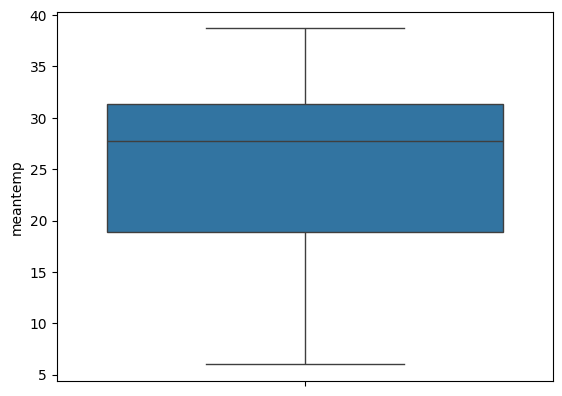

In [45]:
#checking for outliers
sns.boxplot(df['meantemp'])

<Axes: >

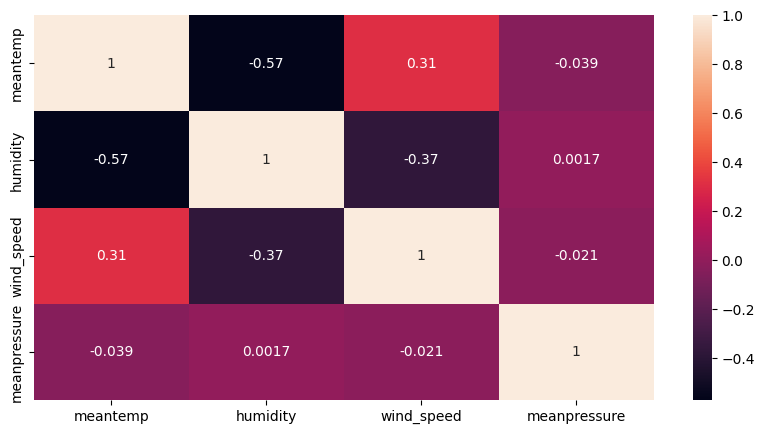

In [28]:
#plotting the correlation matrix
df_num=df[['meantemp','humidity','wind_speed','meanpressure']]
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True)

In [30]:
#transforming the data column
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

<Axes: xlabel='date', ylabel='meantemp'>

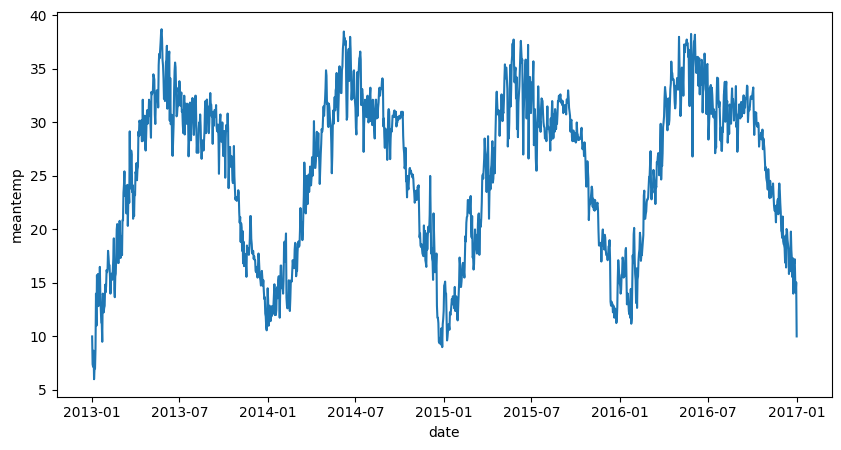

In [39]:
#plotting graphs
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='meantemp',data=df)

<Axes: xlabel='date', ylabel='humidity'>

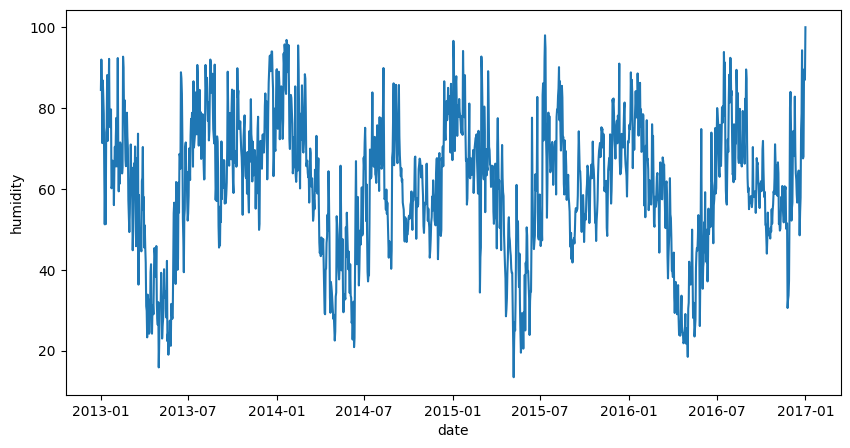

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='humidity',data=df)

<Axes: xlabel='date', ylabel='meanpressure'>

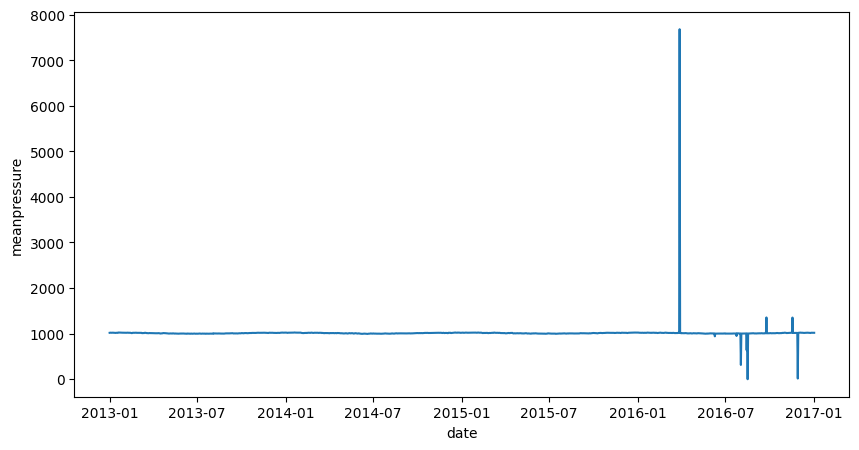

In [41]:
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='meanpressure',data=df)

<Axes: xlabel='date', ylabel='wind_speed'>

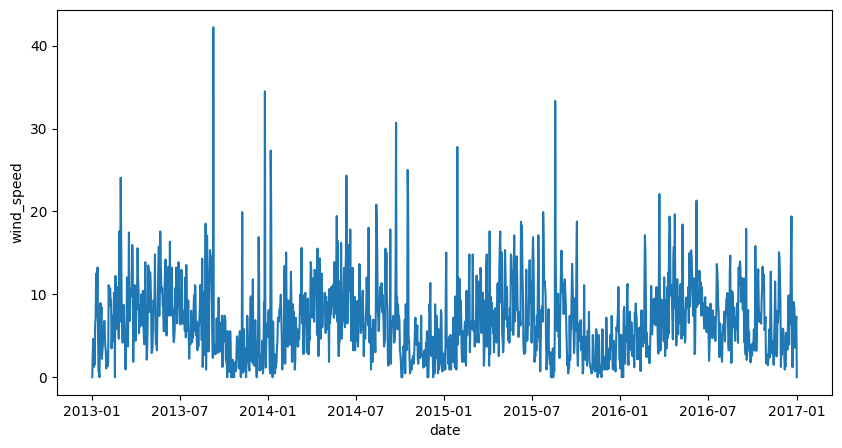

In [43]:
plt.figure(figsize=(10,5))
sns.lineplot(x='date',y='wind_speed',data=df)

In [67]:
#training our model
features = ['humidity','wind_speed','meanpressure']
target = 'meantemp'

scaler = MinMaxScaler()
scaled=scaler.fit_transform(df[features + [target]])

X, Y = [], []
window_size = 60

for i in range(window_size, len(scaled)):
    X.append(scaled[i-window_size:i, :-1])
    Y.append(scaled[i, -1])

X, Y = np.array(X), np.array(Y)


In [60]:
#preparing the test data
df1=pd.read_csv("DailyDelhiClimateTest.csv")
df1['date']=pd.to_datetime(df1['date'])


print(df.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
day             0
year            0
month           0
dtype: int64


In [59]:
df1['day']=df1['date'].dt.day
df1['month']=df1['date'].dt.month
df1['year']=df1['date'].dt.year

scaled_test = MinMaxScaler().fit_transform(df1[features + [target]])


Xtest, Ytest = [], []
window_size = 60

for i in range(window_size, len(scaled)):
    Xtest.append(scaled[i-window_size:i, :-1])
    Ytest.append(scaled[i, -1])

Xtest, Ytest = np.array(Xtest), np.array(Ytest)


In [61]:
#building the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X.shape[1], X.shape[2])),
    LSTM(64, return_sequences=True),
    LSTM(32, return_sequences=False),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, Y, epochs=100,validation_data=(Xtest,Ytest))

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 13s 161ms/step - loss: 0.1268 - val_loss: 0.0179
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0204 - val_loss: 0.0134
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - loss: 0.0136 - val_loss: 0.0118
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 118ms/step - loss: 0.0122 - val_loss: 0.0126
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step - loss: 0.0126 - val_loss: 0.0138
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - loss: 0.0119 - val_loss: 0.0128
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 11s 164ms/step - loss: 0.0102 - val_loss: 0.0120
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0107 - val_loss: 0.0097
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 171ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 10/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0099 - val_loss: 0.0101
Epoch 11/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 149ms/step - loss: 0.0117 - val_loss: 0.0098
Epoch 12/100
44/44 ━━━━━━━━━━━━━━━━

In [65]:
Ypred=model.predict(Xtest)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


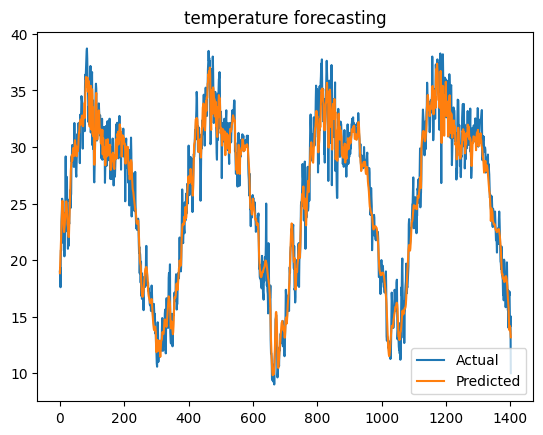

In [69]:
#generating the plot
dummy_preds = np.zeros((len(Ypred), scaled.shape[1]))
dummy_preds[:, -1] = Ypred.flatten()
preds_original_scale = scaler.inverse_transform(dummy_preds)[:, -1]


dummy_y_test = np.zeros((len(Ytest), scaled.shape[1]))
dummy_y_test[:, -1] = Ytest
y_test_original_scale = scaler.inverse_transform(dummy_y_test)[:, -1]


plt.plot(y_test_original_scale, label='Actual')
plt.plot(preds_original_scale, label='Predicted')
plt.legend()
plt.title('temperature forecasting')
plt.show()